# Лабораторная 6.  Логистическая регрессия

Загрузите выбранный датасет и выполните предварительную обработку данных. 

2. Загрузите выбранный датасет и выполните предварительную обработку данных. 

In [456]:
import pandas as pd

df = pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [457]:
missing_values = df.isnull().sum()
print(missing_values)
from sklearn.preprocessing import MinMaxScaler

df.fillna(df.median(), inplace=True)  # Заполнение отсутствующих значений
scaler = MinMaxScaler()  # Нормализация данных
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
scaled_data = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=['float64', 'int64']).columns)

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


3. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

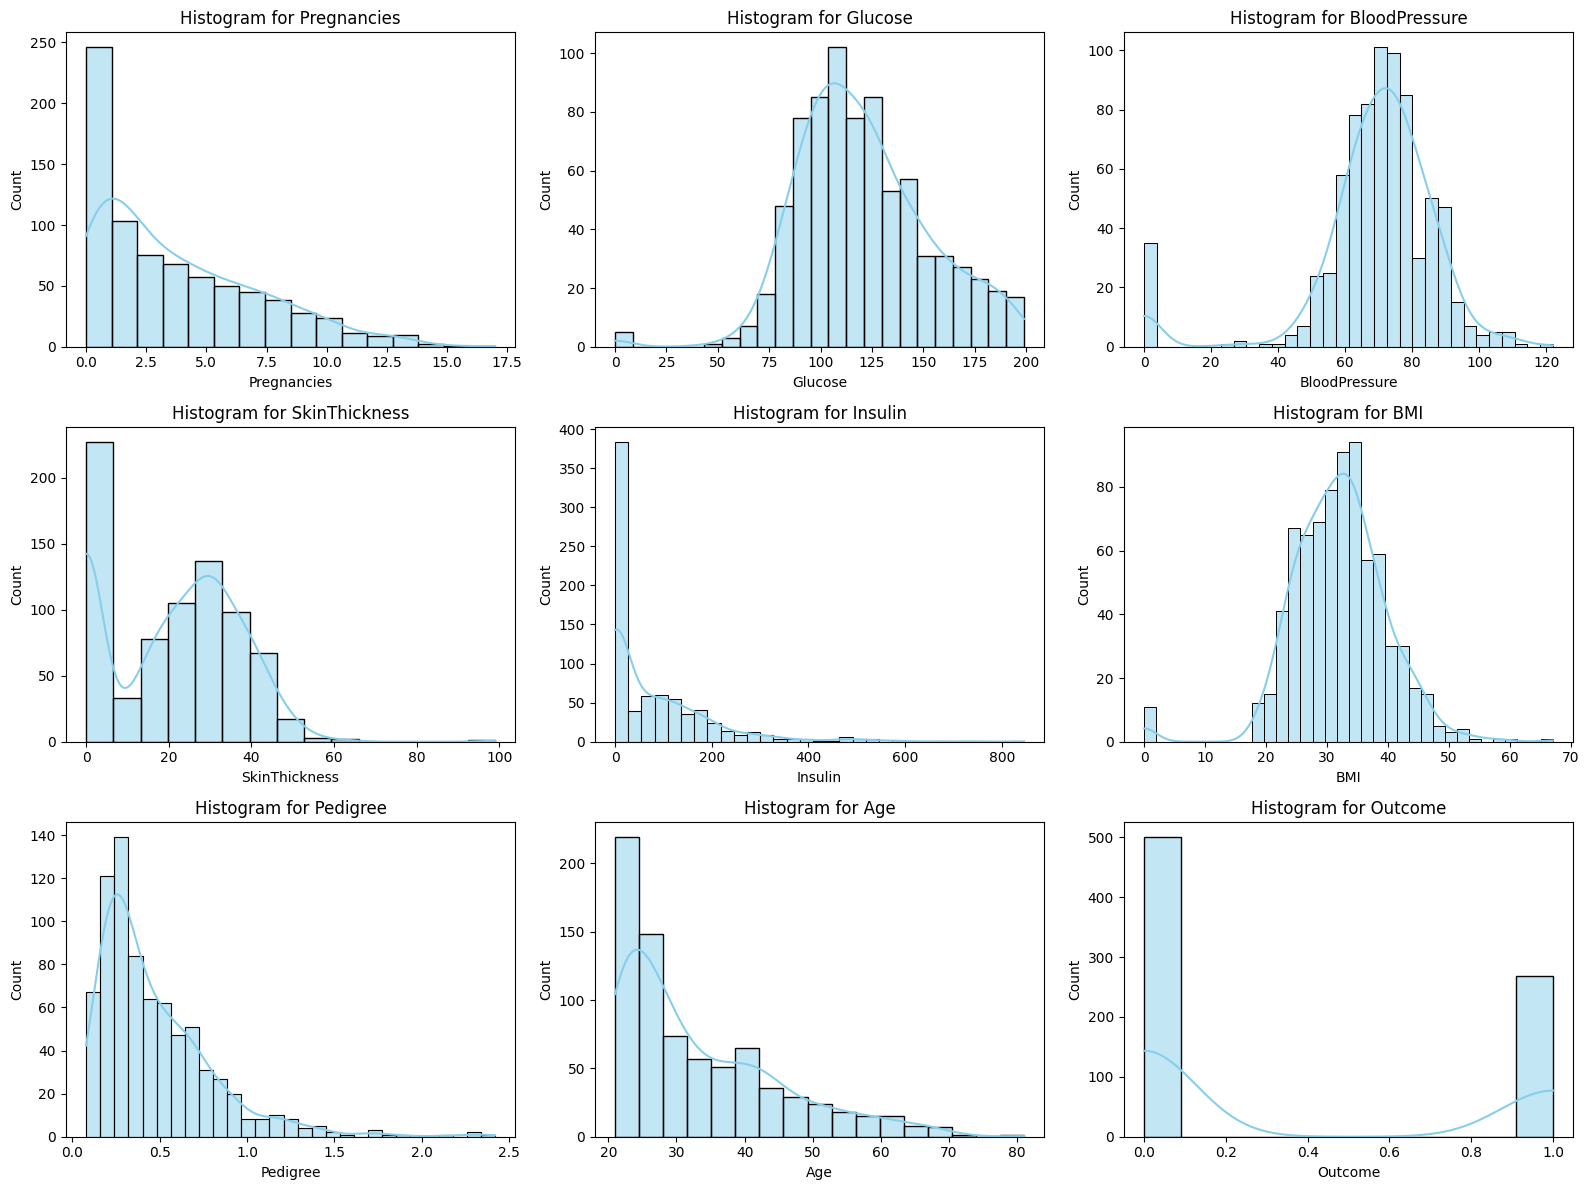

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f"Histogram for {column}")
plt.tight_layout()
plt.show()

4. Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим.

In [459]:
from sklearn.model_selection import train_test_split

X = scaled_data
y = df['Outcome']  # Assuming 'Outcome' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

5. Реализуйте логистическую регрессию "с нуля" без использования сторонних библиотек, кроме NumPy и Pandas. Ваша реализация логистической регрессии должна включать в себя:
    - Функцию для вычисления гипотезы (sigmoid function).
    - Функцию для вычисления функции потерь (log loss).
    - Метод обучения, который включает в себя градиентный спуск.
    - Возможность варьировать гиперпараметры, такие как коэффициент обучения (learning rate) и количество итераций.

In [460]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        for i in range(self.iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        t = self.predict_prob(X) >= threshold
        t = [1 if i >= threshold else 0 for i in t]
        return t

6. Исследование гиперпараметров:
    - Проведите исследование влияния гиперпараметров на производительность модели. Варьируйте следующие гиперпараметры:
        - Коэффициент обучения (learning rate).
        - Количество итераций обучения.
        - Метод оптимизации (например, градиентный спуск или оптимизация Ньютона).

In [461]:
model = LogisticRegression(learning_rate=0.04, iterations=100)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print(*zip(y_test, predictions))

(1, 1) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (1, 1) (1, 1) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (1, 1) (1, 1) (0, 0) (0, 0) (0, 0) (1, 1) (1, 1) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (1, 1) (1, 1) (0, 0) (0, 0) (0, 0) (1, 1) (1, 1) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (1, 1) (0, 0) (1, 1) (1, 1) (0, 0) (1, 1) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (1, 1) (1, 1) (1, 1) (1, 1) (0, 0) (1, 1) (0, 0) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (1, 1) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (1, 1) (1, 1) (0, 0)

7. Оценка модели:
    - Для каждой комбинации гиперпараметров оцените производительность модели на тестовом наборе данных, используя метрики, такие как accuracy, precision, recall и F1-Score.

In [462]:
# Step 7: Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



Сделайте выводы о том, какие значения гиперпараметров наилучшим образом работают для данного набора данных и задачи классификации. Обратите внимание на изменение производительности модели при варьировании гиперпараметров.